In [6]:
# Create GAN for independent and identically distributed data

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import secrets


class GAN:
    def __init__(self, P = 0.75, seq_len=100, latent_dim = 50):
        
        self.P = P
        self.seq_len = seq_len
        self.latent_dim = latent_dim
        seed = secrets.randbits(128)
        self.rng = np.random.default_rng(seed)
        self.build_generator()
        self.build_discriminator()
        self.build_gan()
        print(self.P)
    
    def generate_real_samples(self, n_samples):
        X = self.rng.binomial(1, self.P, (n_samples, self.seq_len)) 
        y = np.ones((n_samples, 1)) * 0.9
        return X, y
    
    def generate_fake_samples(self, n_samples):
        X = self.generator.predict(np.random.normal(0, 1, (n_samples, self.latent_dim)))
        y = np.zeros((n_samples, 1))
        return X, y
    
    def calculate_P(self, n_samples):
        X, _ = self.generate_fake_samples(n_samples)
        return np.mean(X)
    
    def build_generator(self):
        self.generator = tf.keras.models.Sequential([
            tf.keras.layers.Dense(self.seq_len * 200, input_shape=(self.latent_dim,)),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Reshape((self.seq_len, 200)),
            tf.keras.layers.LSTM(100, return_sequences=True),
            # tf.keras.layers.LSTM(100, return_sequences=True),
            # tf.keras.layers.LSTM(100, return_sequences=True),
            # tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid'),
            
        ])
    def summarize_generator(self):
        self.generator.summary()

    def build_discriminator(self):
        self.discriminator = tf.keras.models.Sequential([
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, input_shape=(self.seq_len, 1), return_sequences=True)),
            # tf.keras.layers.Dropout(0.5),
            # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
            # tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=False)),
            # tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(1, activation='sigmoid'),
        ])
        self.discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    def summarize_discriminator(self):
        self.discriminator.summary()
    
    def build_gan(self):
        self.discriminator.trainable = False
        self.gan = tf.keras.models.Sequential([
            self.generator,
            self.discriminator,
        ])
        self.gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())
        
    def train(self, epochs = 10, batch_size = 128, data_size = 100000):
        l1_hist = []
        l2_hist = []
        l3_hist = []
        ac1_hist = []
        ac2_hist = []
        total = data_size//batch_size
        train_data_x, train_data_y = self.generate_real_samples(data_size)
        for i in range(epochs):
            print("Iteration:", i)
            # Train the discriminator
            
            for k in range(total):
                print(k,"/",total,end="\r")
                idx = np.random.randint(0, data_size, batch_size//2)
                X_real, y_real = train_data_x[idx], train_data_y[idx]
                X_fake, y_fake = self.generate_fake_samples(batch_size//2)
                

                l1, ac1 = self.discriminator.train_on_batch(X_real, y_real)
                l2, ac2 = self.discriminator.train_on_batch(X_fake, y_fake)
                
                X_fake = np.random.normal(0, 1, (batch_size, self.latent_dim))
                y_fake = np.ones((batch_size, 1))
                l3 = self.gan.train_on_batch(X_fake, y_fake)
                
                l1_hist.append(l1)
                l2_hist.append(l2)
                l3_hist.append(l3)
                ac1_hist.append(ac1)
                ac2_hist.append(ac2)
                
            # Show plots of the losses and accuracies
            calc_p = self.calculate_P(100000)
            print(calc_p)
            pred = gan.generator.predict(np.random.normal(0, 1, (1, 50)))
            print(pred)
            print(gan.discriminator.predict(pred))
            print("Loss:",np.mean(np.abs(calc_p - (self.P + 10))))
            if i % 10 >= 0:
                plt.figure(figsize=(10, 10))
                plt.subplot(2, 1, 1)
                plt.plot(l1_hist, label="Discriminator(Real)")
                plt.plot(l2_hist, label="Discriminator(Fake)")
                plt.plot(l3_hist, label="Generator")
                plt.legend()
                plt.title("Losses")
                plt.subplot(2, 1, 2)
                plt.plot(ac1_hist, label="Accuracy(Real)")
                plt.plot(ac2_hist, label="Accuracy(fake)")
                plt.legend()
                plt.title("Accuracies")
                plt.show()
                l1_hist = []
                l2_hist = []
                l3_hist = []
                ac1_hist = []
                ac2_hist = []

In [7]:
print("Hello")
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

Hello
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
print("DADAD")

DADAD


In [9]:
gan = GAN()
gan.summarize_generator()
gan.summarize_discriminator()

0.75
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20000)             1020000   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20000)             0         
                                                                 
 reshape_1 (Reshape)         (None, 100, 200)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 100)          120400    
                                                                 
 dense_4 (Dense)             (None, 100, 1)            101       
                                                                 
Total params: 1,140,501
Trainable params: 1,140,501
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________

In [10]:
rng2 = np.random.default_rng()
print(rng2.binomial(1, 0.5, (4,4)) + 10)

[[10 11 10 10]
 [10 11 10 11]
 [10 10 11 11]
 [10 10 10 11]]


Iteration: 0


2024-02-09 03:46:17.723647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2024-02-09 03:46:22.113803: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x14d678d88420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-09 03:46:22.113845: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-02-09 03:46:22.118642: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-09 03:46:22.287636: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


0.81266725
[[[0.953664  ]
  [0.97318506]
  [0.98012984]
  [0.9789958 ]
  [0.97638196]
  [0.9656145 ]
  [0.9516086 ]
  [0.94196755]
  [0.93401426]
  [0.9180167 ]
  [0.89146185]
  [0.87332445]
  [0.8259871 ]
  [0.7512211 ]
  [0.6518096 ]
  [0.55943143]
  [0.51824623]
  [0.36130396]
  [0.26967627]
  [0.4095313 ]
  [0.80799544]
  [0.95785713]
  [0.97972876]
  [0.98274016]
  [0.9824582 ]
  [0.9815035 ]
  [0.98101324]
  [0.9801236 ]
  [0.976641  ]
  [0.9734613 ]
  [0.97026855]
  [0.9657835 ]
  [0.9565943 ]
  [0.94751114]
  [0.9310365 ]
  [0.90780693]
  [0.86939776]
  [0.81536716]
  [0.7712898 ]
  [0.734376  ]
  [0.71110713]
  [0.7070898 ]
  [0.68258834]
  [0.66955817]
  [0.62360895]
  [0.54345655]
  [0.48626602]
  [0.42415726]
  [0.38867825]
  [0.3563461 ]
  [0.36353084]
  [0.38450554]
  [0.4344208 ]
  [0.46817157]
  [0.50171596]
  [0.5308651 ]
  [0.54794866]
  [0.5355873 ]
  [0.5264552 ]
  [0.4988333 ]
  [0.4988559 ]
  [0.50338197]
  [0.5519907 ]
  [0.6563914 ]
  [0.77269936]
  [0.8551095 ]

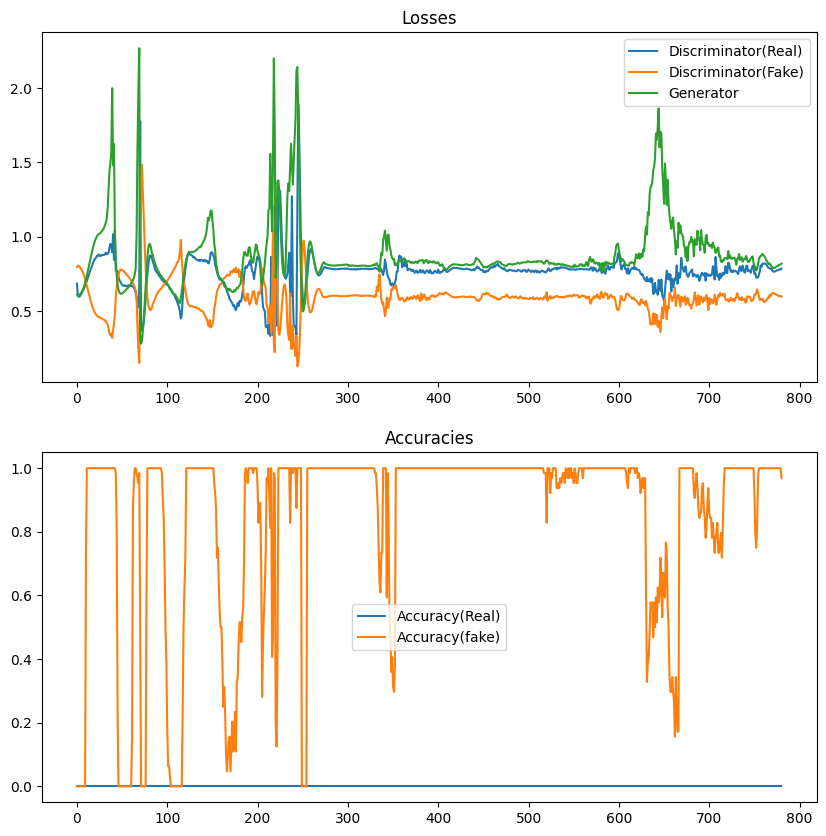

Iteration: 1
0.71754414
[[[0.9858856 ]
  [0.9938426 ]
  [0.9917659 ]
  [0.82184935]
  [0.347882  ]
  [0.8059406 ]
  [0.1790761 ]
  [0.951581  ]
  [0.25390816]
  [0.9004459 ]
  [0.9695209 ]
  [0.97477394]
  [0.80317783]
  [0.98919487]
  [0.9933236 ]
  [0.04578966]
  [0.97179145]
  [0.23910387]
  [0.9514882 ]
  [0.9680884 ]
  [0.95769656]
  [0.0318466 ]
  [0.994679  ]
  [0.7193598 ]
  [0.15291493]
  [0.9926439 ]
  [0.4902087 ]
  [0.810192  ]
  [0.99021775]
  [0.98724335]
  [0.28770533]
  [0.9743275 ]
  [0.961518  ]
  [0.9920745 ]
  [0.9781253 ]
  [0.04831769]
  [0.994216  ]
  [0.39314237]
  [0.9127832 ]
  [0.39455077]
  [0.8286113 ]
  [0.821303  ]
  [0.052793  ]
  [0.9606753 ]
  [0.1996886 ]
  [0.9269637 ]
  [0.96860045]
  [0.98876977]
  [0.9949162 ]
  [0.99402076]
  [0.99440503]
  [0.9916419 ]
  [0.9687855 ]
  [0.97590065]
  [0.9351718 ]
  [0.19222221]
  [0.9756379 ]
  [0.23562981]
  [0.8268164 ]
  [0.65710294]
  [0.6407306 ]
  [0.5696836 ]
  [0.67496663]
  [0.5050284 ]
  [0.81673974]
 

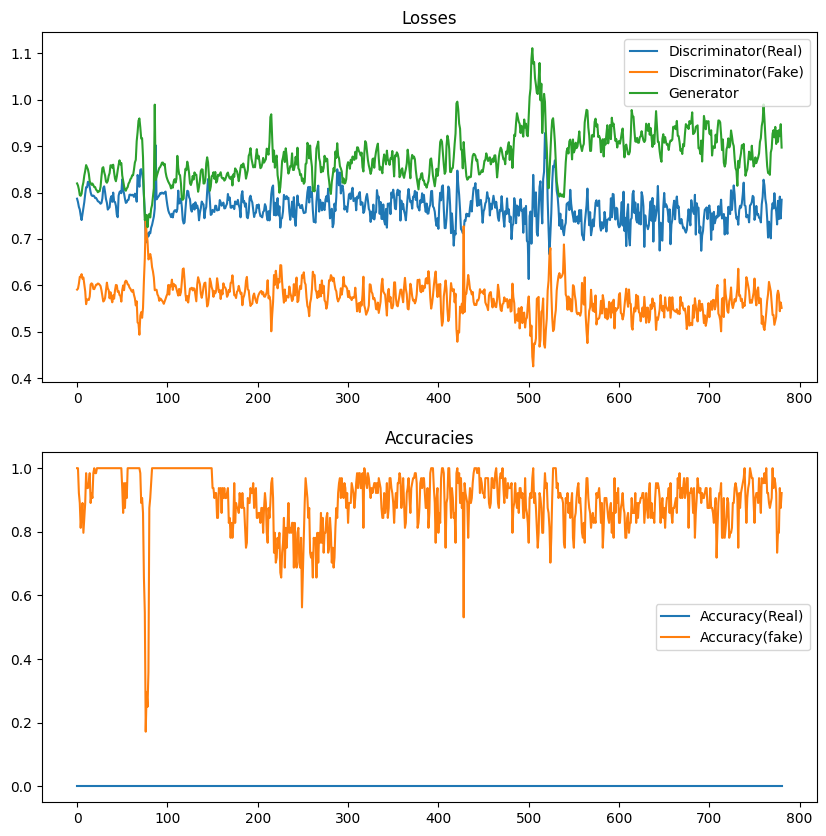

Iteration: 2
0.7807657
[[[9.9882239e-01]
  [9.9979967e-01]
  [9.9989426e-01]
  [9.9970347e-01]
  [1.4880291e-02]
  [8.6369477e-03]
  [9.6790588e-01]
  [3.4738085e-01]
  [9.5946676e-01]
  [9.9589229e-01]
  [9.9025458e-01]
  [9.9962199e-01]
  [9.9985445e-01]
  [9.9985206e-01]
  [8.9688498e-01]
  [1.9042272e-02]
  [9.4269252e-01]
  [9.9798512e-01]
  [9.9751675e-01]
  [9.9946338e-01]
  [9.9980432e-01]
  [9.9874592e-01]
  [2.9463347e-03]
  [9.9600118e-01]
  [9.4302255e-01]
  [9.9904817e-01]
  [9.8989081e-01]
  [9.3938340e-04]
  [9.9882752e-01]
  [2.0443546e-02]
  [3.7903064e-01]
  [9.9782604e-01]
  [9.9955159e-01]
  [9.9978572e-01]
  [9.9788755e-01]
  [2.4237980e-03]
  [9.9066216e-01]
  [9.9866629e-01]
  [1.3327895e-01]
  [2.6887844e-03]
  [9.9695671e-01]
  [6.4704537e-01]
  [2.0603335e-02]
  [9.6359676e-01]
  [9.7240889e-01]
  [8.8465042e-02]
  [4.5315992e-02]
  [8.8498938e-01]
  [9.3416411e-01]
  [9.2948318e-01]
  [9.9928445e-01]
  [9.9978203e-01]
  [9.9785221e-01]
  [2.6461277e-03]
  [9.

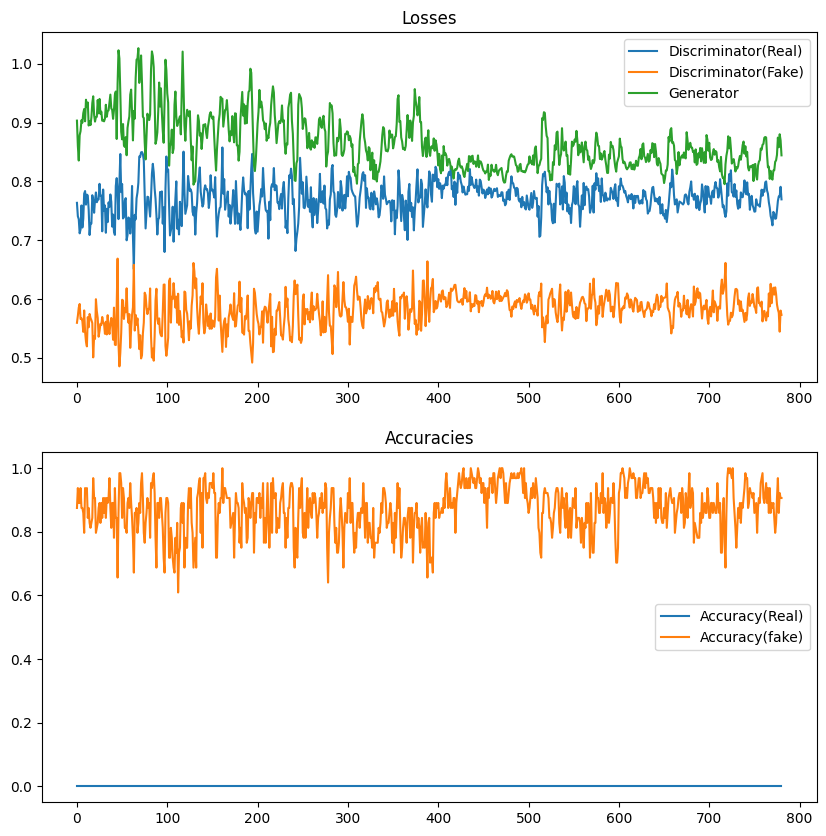

Iteration: 3
0.7920246
[[[9.9943596e-01]
  [9.2164540e-01]
  [3.7182702e-04]
  [9.9740738e-01]
  [9.9906403e-01]
  [9.9963295e-01]
  [8.3652581e-04]
  [4.6459591e-01]
  [9.9888986e-01]
  [9.9971098e-01]
  [6.0935895e-04]
  [9.9950004e-01]
  [9.9986851e-01]
  [9.9993992e-01]
  [9.6880865e-01]
  [9.2509764e-01]
  [9.9988103e-01]
  [9.9996769e-01]
  [4.3774210e-03]
  [4.3779805e-01]
  [9.2537200e-01]
  [8.6448545e-04]
  [7.3253673e-01]
  [9.9706656e-01]
  [9.9672073e-01]
  [2.4151805e-01]
  [2.1577444e-02]
  [9.9965703e-01]
  [9.9991977e-01]
  [9.9992895e-01]
  [1.4460592e-03]
  [9.9982989e-01]
  [9.8970020e-01]
  [9.9982220e-01]
  [9.9993789e-01]
  [9.9996233e-01]
  [9.7711790e-01]
  [1.8765038e-01]
  [9.5894116e-01]
  [5.5017120e-01]
  [9.9966788e-01]
  [2.4824460e-01]
  [9.9574018e-01]
  [1.6326058e-01]
  [9.9954283e-01]
  [9.9986601e-01]
  [9.9972934e-01]
  [9.1403136e-03]
  [9.9984968e-01]
  [9.9902391e-01]
  [9.9974006e-01]
  [9.9929118e-01]
  [9.8808217e-01]
  [2.9659123e-04]
  [9.

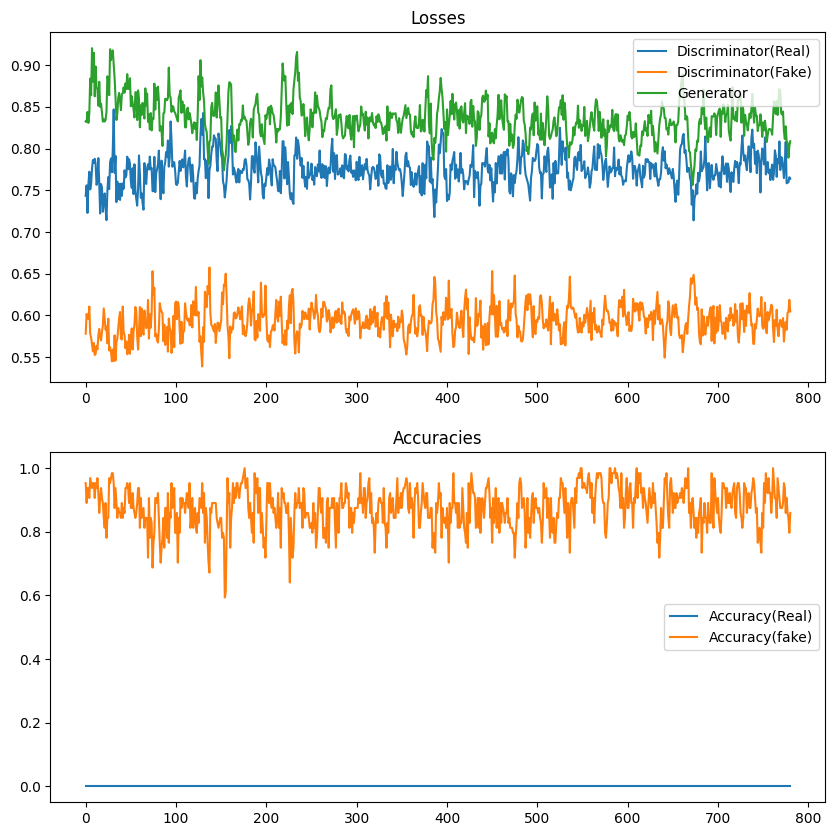

Iteration: 4
0.7841986
[[[9.9975127e-01]
  [9.9996948e-01]
  [9.9998927e-01]
  [9.9996948e-01]
  [1.6597040e-04]
  [9.9990094e-01]
  [9.9998069e-01]
  [9.9998856e-01]
  [9.9998987e-01]
  [9.9998724e-01]
  [9.9994850e-01]
  [9.9988461e-01]
  [3.0582584e-04]
  [9.9985778e-01]
  [9.9933690e-01]
  [9.9760950e-01]
  [2.4423108e-02]
  [3.2318651e-04]
  [9.9988151e-01]
  [9.9986053e-01]
  [9.9900502e-01]
  [1.1754200e-04]
  [6.1518484e-01]
  [9.9998569e-01]
  [1.3862507e-03]
  [9.9996281e-01]
  [9.9987698e-01]
  [2.9646148e-04]
  [9.9984336e-01]
  [9.9989390e-01]
  [4.0715610e-04]
  [9.9988997e-01]
  [9.9725854e-01]
  [9.9974984e-01]
  [3.6212258e-02]
  [3.6394727e-04]
  [9.9990094e-01]
  [9.9991429e-01]
  [6.2953721e-04]
  [3.9983084e-03]
  [9.9940014e-01]
  [9.9964297e-01]
  [9.9961853e-01]
  [4.0680435e-04]
  [8.5243636e-01]
  [9.9851638e-01]
  [9.9996269e-01]
  [9.9998736e-01]
  [9.9989820e-01]
  [9.9936038e-01]
  [1.9824300e-04]
  [3.7937127e-02]
  [9.9634027e-01]
  [9.9983943e-01]
  [9.

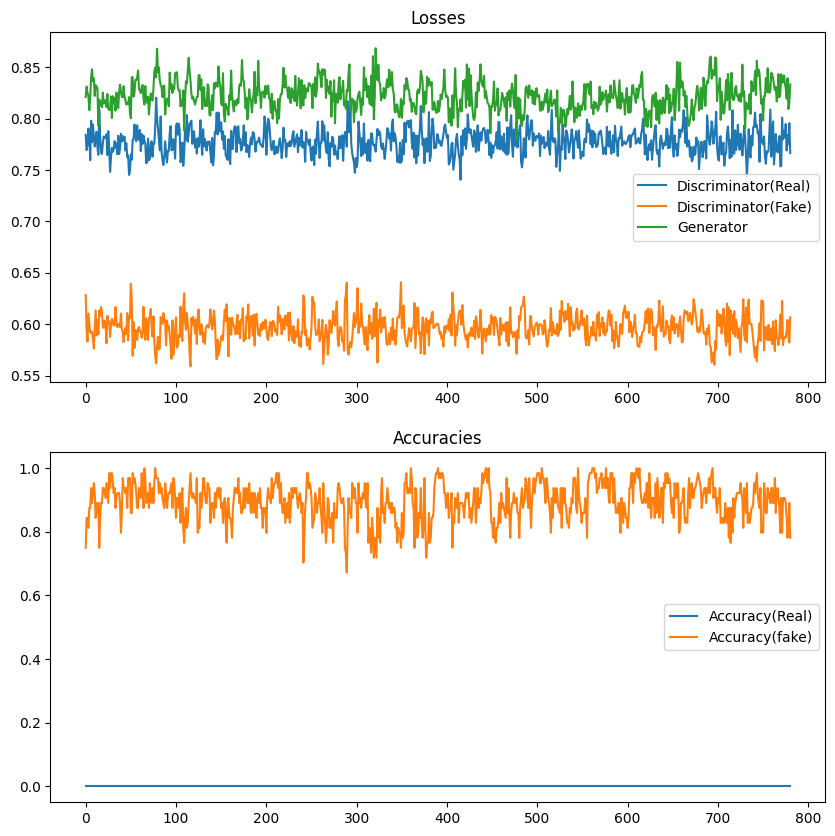

Iteration: 5
0.7773759
[[[9.9994195e-01]
  [5.2913086e-04]
  [9.9994826e-01]
  [8.9987981e-05]
  [9.9989295e-01]
  [2.3564310e-03]
  [9.9991238e-01]
  [9.9990106e-01]
  [9.2293876e-01]
  [9.9965918e-01]
  [9.9999130e-01]
  [9.9999452e-01]
  [9.9999297e-01]
  [1.3228063e-03]
  [9.9995399e-01]
  [9.9996686e-01]
  [9.9997675e-01]
  [1.1548381e-03]
  [1.8181034e-03]
  [6.7337835e-01]
  [9.9997771e-01]
  [1.3233024e-04]
  [9.9964237e-01]
  [9.9973685e-01]
  [9.9996531e-01]
  [3.7903850e-05]
  [9.9998438e-01]
  [8.3639956e-05]
  [9.9998903e-01]
  [1.7708150e-04]
  [1.9404544e-02]
  [9.9462801e-01]
  [9.9621958e-01]
  [9.9994206e-01]
  [9.9999619e-01]
  [9.9999464e-01]
  [9.9995840e-01]
  [1.7064856e-04]
  [1.4834217e-03]
  [7.7901278e-03]
  [9.9954456e-01]
  [9.9995017e-01]
  [9.9999380e-01]
  [9.9998283e-01]
  [1.1007989e-02]
  [9.8940301e-01]
  [5.6840402e-01]
  [4.6621197e-01]
  [6.0371035e-03]
  [9.9992335e-01]
  [7.2093360e-05]
  [9.9782556e-01]
  [9.9976224e-01]
  [9.9998999e-01]
  [9.

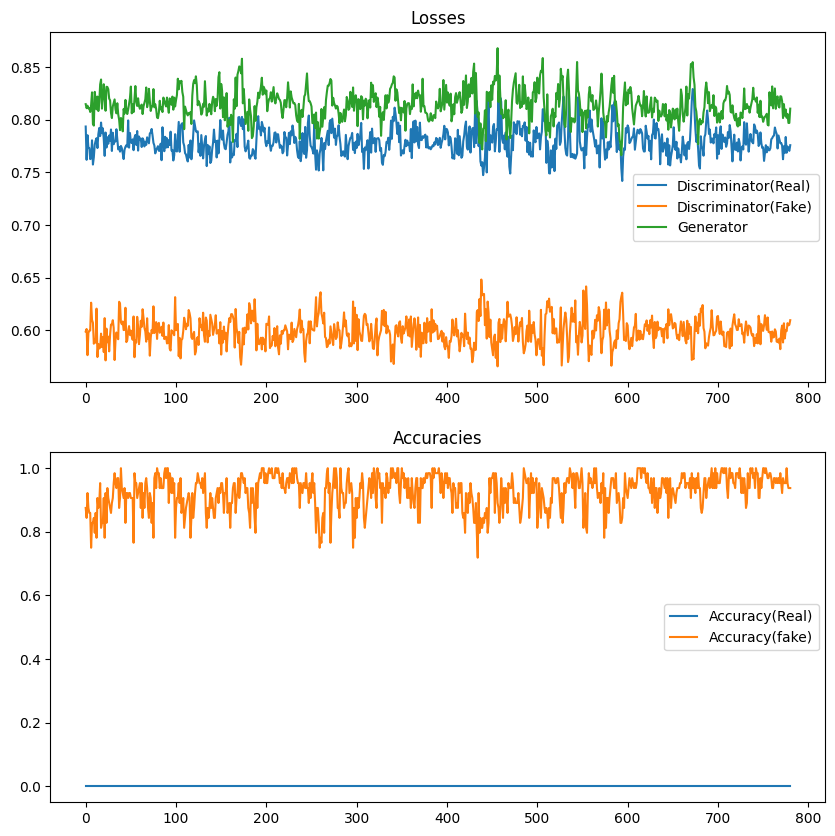

Iteration: 6
0.76034504
[[[9.79023933e-01]
  [9.99990463e-01]
  [9.99997377e-01]
  [9.85210121e-01]
  [2.03480413e-05]
  [9.99989748e-01]
  [9.99342978e-01]
  [1.09040615e-04]
  [9.99984741e-01]
  [9.98268962e-01]
  [9.99795139e-01]
  [9.99285638e-01]
  [2.66247498e-05]
  [9.99817908e-01]
  [9.99719560e-01]
  [6.76607378e-05]
  [9.99877214e-01]
  [9.99121845e-01]
  [5.91839380e-05]
  [9.94336069e-01]
  [9.99986410e-01]
  [9.99996305e-01]
  [9.99997258e-01]
  [9.99997735e-01]
  [9.99998093e-01]
  [9.99998331e-01]
  [9.99995589e-01]
  [9.99994516e-01]
  [9.99983668e-01]
  [9.99984145e-01]
  [7.53818196e-04]
  [4.64426959e-03]
  [9.98290002e-01]
  [9.99958396e-01]
  [9.99990940e-01]
  [9.99991655e-01]
  [9.99991179e-01]
  [9.99997973e-01]
  [9.99998689e-01]
  [9.99996424e-01]
  [9.99996543e-01]
  [9.99960184e-01]
  [2.62749745e-05]
  [9.99927402e-01]
  [9.99987245e-01]
  [9.99909163e-01]
  [3.90511414e-05]
  [9.99955654e-01]
  [9.99993563e-01]
  [9.99997973e-01]
  [9.99998212e-01]
  [9.99

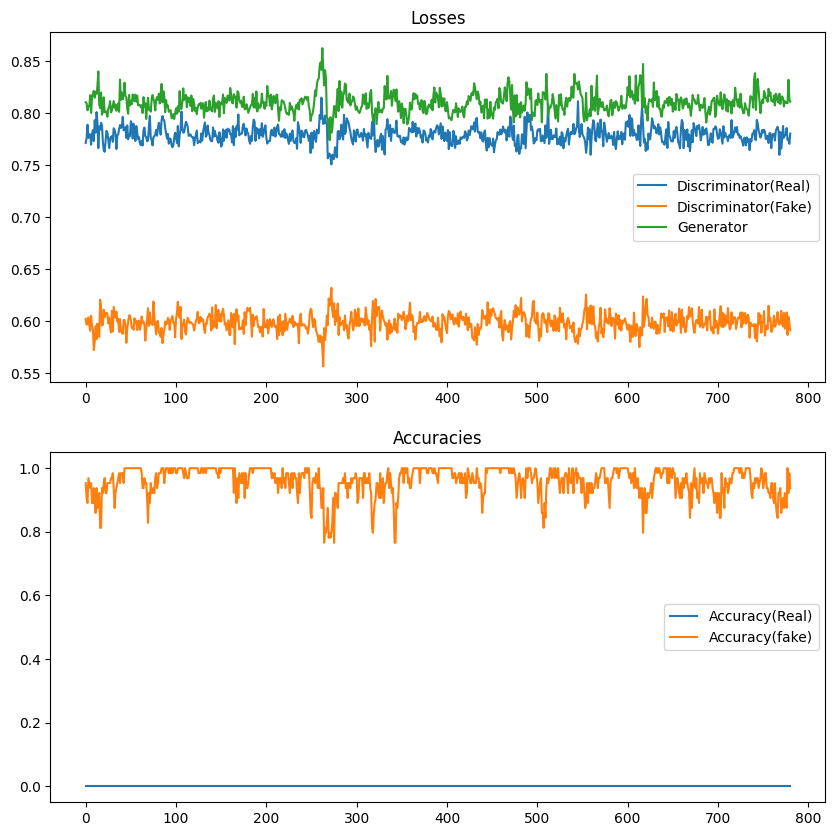

Iteration: 7
0.7546075
[[[9.99962211e-01]
  [9.99991298e-01]
  [9.99999404e-01]
  [9.99999285e-01]
  [9.99999166e-01]
  [1.10498266e-04]
  [9.99983072e-01]
  [1.11067375e-05]
  [9.99993205e-01]
  [9.99998808e-01]
  [9.99999285e-01]
  [9.99995470e-01]
  [9.99996662e-01]
  [9.99980927e-01]
  [3.16958398e-01]
  [9.99651432e-01]
  [9.99963522e-01]
  [9.99825180e-01]
  [1.63460500e-04]
  [9.99992609e-01]
  [9.99996662e-01]
  [4.25184553e-05]
  [1.50205172e-03]
  [9.99983668e-01]
  [1.24258850e-05]
  [1.03081400e-02]
  [9.99833703e-01]
  [9.99764025e-01]
  [9.99997854e-01]
  [9.99994397e-01]
  [9.99971986e-01]
  [2.47428790e-01]
  [8.24422841e-06]
  [9.99868870e-01]
  [9.99991775e-01]
  [9.99998927e-01]
  [9.99999404e-01]
  [9.99999285e-01]
  [9.99679685e-01]
  [1.00551479e-05]
  [9.99926090e-01]
  [9.99985576e-01]
  [9.99983788e-01]
  [8.92313801e-06]
  [9.99936461e-01]
  [9.99934316e-01]
  [9.99286711e-01]
  [9.46482062e-01]
  [9.99992728e-01]
  [5.90843447e-05]
  [3.38092395e-05]
  [9.930

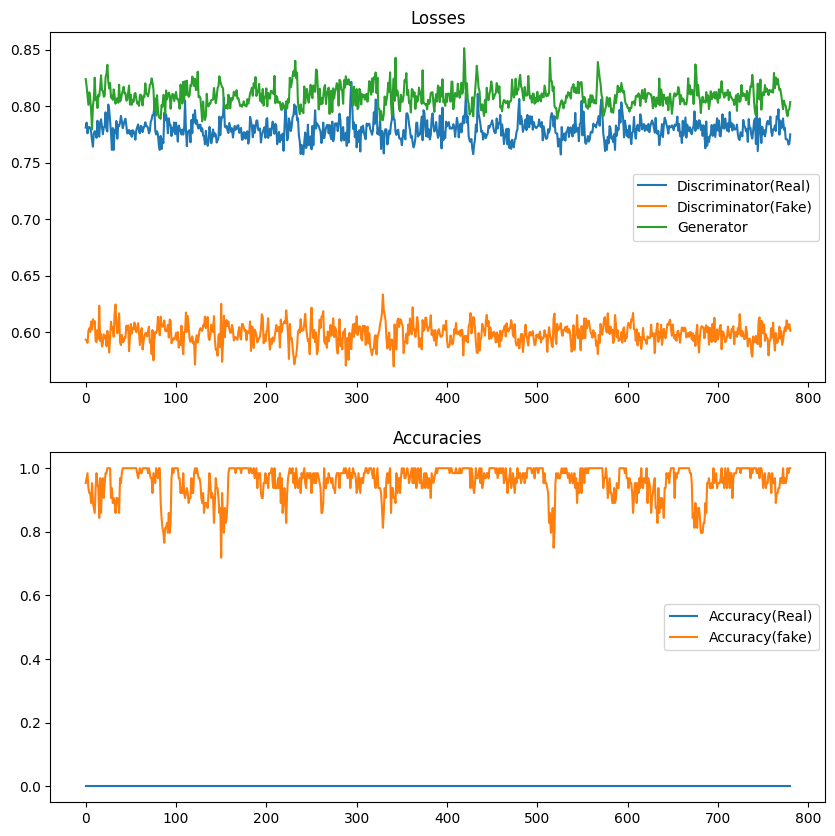

Iteration: 8
0.7621434
[[[9.9998736e-01]
  [9.9999928e-01]
  [9.9999964e-01]
  [9.9999928e-01]
  [9.9999952e-01]
  [9.9999964e-01]
  [9.9990416e-01]
  [9.9994695e-01]
  [3.0275980e-06]
  [9.9961084e-01]
  [9.9998915e-01]
  [6.7974693e-06]
  [9.9993038e-01]
  [9.9999857e-01]
  [9.9999285e-01]
  [9.9999905e-01]
  [9.9999917e-01]
  [9.9999917e-01]
  [9.9996674e-01]
  [9.8952931e-01]
  [9.9999559e-01]
  [9.9999917e-01]
  [9.9999809e-01]
  [9.9999905e-01]
  [9.9999762e-01]
  [9.9999881e-01]
  [9.9964297e-01]
  [9.9999630e-01]
  [9.9999952e-01]
  [9.9999845e-01]
  [9.9999940e-01]
  [9.9999976e-01]
  [9.9999869e-01]
  [9.9999785e-01]
  [9.9999917e-01]
  [7.6035039e-06]
  [9.9544013e-01]
  [9.9999082e-01]
  [9.4858730e-01]
  [9.9999762e-01]
  [7.6668042e-01]
  [9.9998224e-01]
  [9.9999535e-01]
  [9.9999106e-01]
  [9.9999571e-01]
  [5.2303658e-06]
  [9.9999475e-01]
  [7.2380477e-01]
  [8.7383660e-06]
  [9.9993920e-01]
  [9.9998534e-01]
  [6.4635124e-06]
  [9.9999166e-01]
  [9.9999392e-01]
  [3.

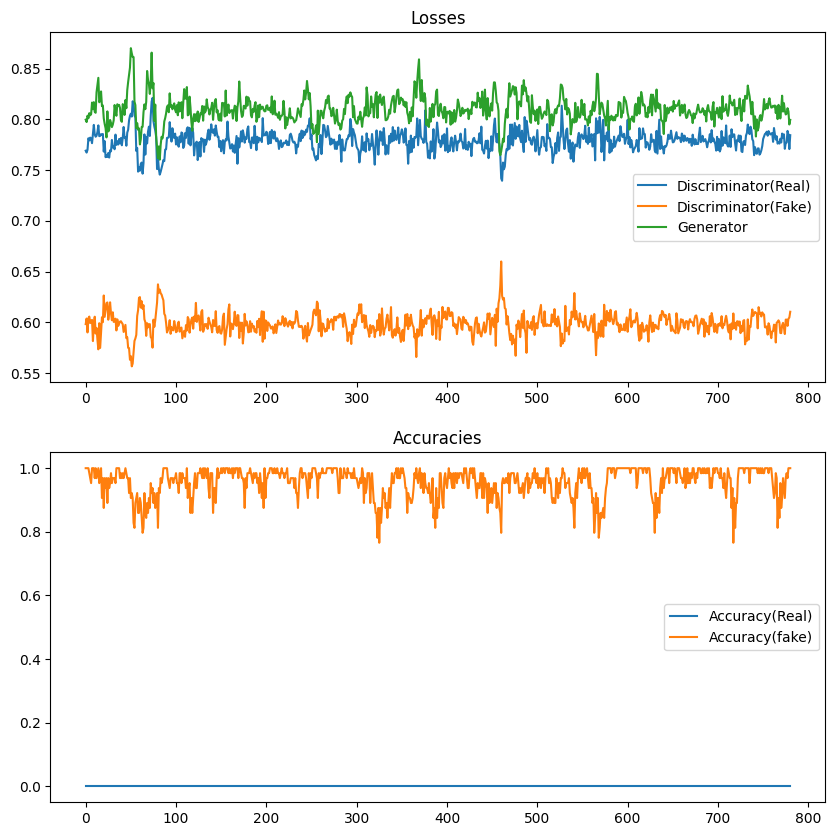

Iteration: 9
0.7281431
[[[9.9997616e-01]
  [9.9999976e-01]
  [9.9999976e-01]
  [4.3882577e-07]
  [9.9998391e-01]
  [9.9999928e-01]
  [9.9999881e-01]
  [9.9999893e-01]
  [9.9999964e-01]
  [9.9999845e-01]
  [9.9999309e-01]
  [3.8958638e-06]
  [9.9995100e-01]
  [9.9998558e-01]
  [9.6394376e-07]
  [9.9880290e-01]
  [9.9997771e-01]
  [9.9999452e-01]
  [9.9999571e-01]
  [9.9999917e-01]
  [9.9999952e-01]
  [9.9999964e-01]
  [9.9999928e-01]
  [9.9999654e-01]
  [1.4547961e-06]
  [9.9998915e-01]
  [9.9999869e-01]
  [1.9820134e-06]
  [9.9942988e-01]
  [9.9999881e-01]
  [9.9999785e-01]
  [9.9999547e-01]
  [9.9998951e-01]
  [9.9999249e-01]
  [6.7824458e-06]
  [9.9991214e-01]
  [9.9999666e-01]
  [9.9999809e-01]
  [3.7059050e-05]
  [1.0787342e-06]
  [9.9998724e-01]
  [9.9998820e-01]
  [6.0072230e-06]
  [9.9999237e-01]
  [9.9999881e-01]
  [9.9999690e-01]
  [2.1840788e-06]
  [9.9985385e-01]
  [9.9993861e-01]
  [1.1917703e-03]
  [9.9995935e-01]
  [9.9999571e-01]
  [9.9992955e-01]
  [9.9999666e-01]
  [9.

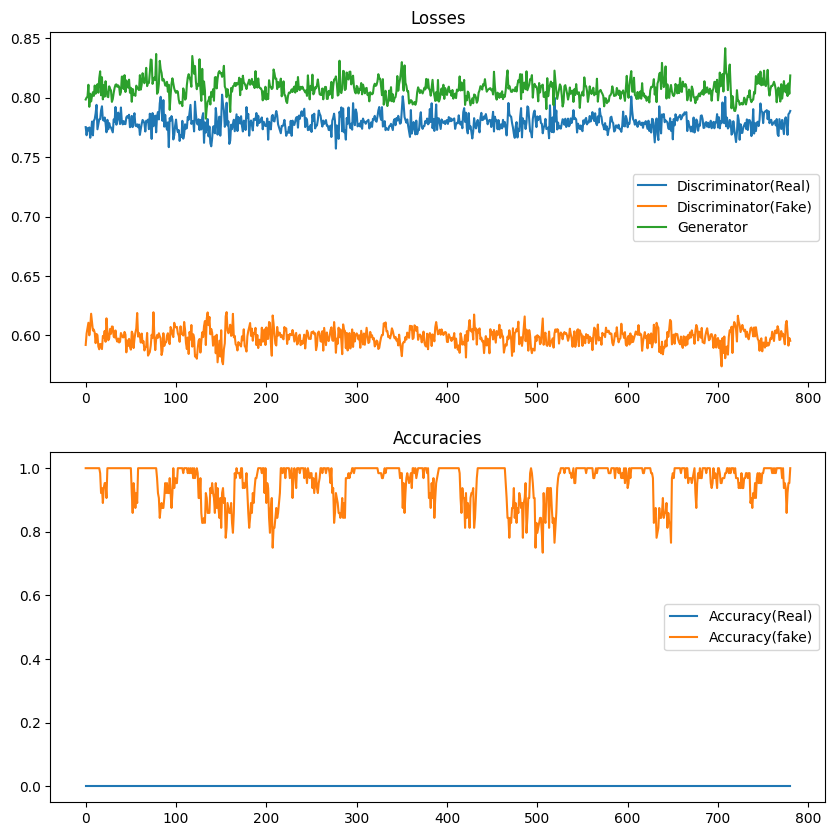

In [11]:
tf.keras.utils.disable_interactive_logging()
gan.train(epochs=10)

In [12]:
print((gan.generator.predict(np.random.normal(0, 1, (1, 50)))))
print((gan.generate_real_samples(1)[0]))

[[[9.9999821e-01]
  [9.9999976e-01]
  [9.7370923e-02]
  [9.9999642e-01]
  [9.9999964e-01]
  [9.9999893e-01]
  [9.9999869e-01]
  [5.6766606e-07]
  [4.2396816e-04]
  [9.9987376e-01]
  [9.9999893e-01]
  [9.9999976e-01]
  [9.9999750e-01]
  [6.4900291e-06]
  [1.8836074e-02]
  [7.7330493e-03]
  [2.1879985e-06]
  [9.9999654e-01]
  [5.7714688e-06]
  [2.7206029e-06]
  [9.9762100e-01]
  [9.9958235e-01]
  [9.1763218e-07]
  [9.9986589e-01]
  [9.9999952e-01]
  [9.9999940e-01]
  [2.6208960e-07]
  [9.9967992e-01]
  [9.9999881e-01]
  [9.9999928e-01]
  [9.9999619e-01]
  [9.9998307e-01]
  [5.7224707e-07]
  [9.9999678e-01]
  [9.9993539e-01]
  [7.7727668e-07]
  [9.9997985e-01]
  [9.9999881e-01]
  [1.2826112e-06]
  [9.9965167e-01]
  [9.9999654e-01]
  [9.9999964e-01]
  [9.9999964e-01]
  [9.9999988e-01]
  [9.9999988e-01]
  [9.9999976e-01]
  [2.7380882e-05]
  [9.9970239e-01]
  [9.9999404e-01]
  [9.9998462e-01]
  [4.5249740e-07]
  [9.9998164e-01]
  [6.1581336e-04]
  [9.9997854e-01]
  [9.9999905e-01]
  [9.99999

In [17]:
x = gan.generator.predict(np.random.normal(0, 1, (10000, 50))).flatten()
y = np.ones(x.shape)
print(x.min(),x.max(), x.mean())
fig = plt.figure(figsize=(100, 100))
ax = fig.subplots()
vals = ax.hist(x, bins=1000, alpha=0.5, label="Generated", range=(-0.5,1.5))
ax.set_xlim([-0.5,1.5])
ax.set_ylim([0, vals[0].max() + 10000])
ax.set_xticks(np.arange(-0.5, 1.5, (1.5+0.5)/100))   
fig.show()

5.010691e-08 1.0 0.7284501


In [23]:
print(np.argmin(x))

42703


In [24]:
print(x[42703])


-0.95749116
